## Synopsis
This code plots the averaged SA-XPCS results for the temperature ramping (up and down).   
Need to run `8IDI_reduced_H06.ipynb` to generate the `8IDI_reduced_H06.pickle` file prior to running the figure rendering code

### Initialize

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import csv
from scipy.optimize import minimize
from matplotlib.lines import Line2D
from saxs_tools import preprocess_data, iterative_scaling

### Load the data saved by H06_Analysis.ipynb

In [2]:

# Load the data
with open('8IDI_reduced_H06.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)
    

### Preprocess the data and scale the SAXS data

`preprocess_data` removes non-positive values for scattering intensities, which can result from background subtraction on regions with very weak scattering. 

`iterative_scaling` multiplies a coefficient to the q and I from each SAXS curve at different temperature during the heat ramp. For SAXS at each temperature, the code loops over a range of coefficients to find the one that yields the smallest `chi2` in log-log scale compared to the previous temperature. The `chi2` is used as a marker for the degree of overlap between SAXS results at different temperatures. The error bar on `q_scale` is defined as the curvature of `chi2` to linear perturbation of `q_scale`.




In [3]:

avg_ramp_up_cleaned, ql_sta_cleaned = preprocess_data(avg_ramp_up, ql_sta)


In [4]:

scaling_results, scaled_curves = iterative_scaling(avg_ramp_up_cleaned, ql_sta_cleaned)


Working on dataset 1
Working on dataset 2
Working on dataset 3
Working on dataset 4
Working on dataset 5
Working on dataset 6
Working on dataset 7
Working on dataset 8
Working on dataset 9


### Plot the scaled SAXS results

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3025077/2695661920.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontsize=12)
/tmp/ipykernel_3025077/2695661920.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('I (cm$^\mathdefault{-1}$)', fontsize=12)


Curve 0.0: q_scale=1.0000, i_scale=1.0000, chi2=0.0000
Curve 1.0: q_scale=1.0600, i_scale=0.8850, chi2=0.0001
Curve 2.0: q_scale=1.1500, i_scale=0.7510, chi2=0.0001
Curve 3.0: q_scale=1.2700, i_scale=0.6310, chi2=0.0001
Curve 4.0: q_scale=1.4900, i_scale=0.4880, chi2=0.0001
Curve 5.0: q_scale=2.0200, i_scale=0.2920, chi2=0.0001
Curve 6.0: q_scale=3.5500, i_scale=0.1010, chi2=0.0000
Curve 7.0: q_scale=6.1100, i_scale=0.0170, chi2=0.0001
Curve 8.0: q_scale=10.1400, i_scale=0.0020, chi2=0.0004
Curve 9.0: q_scale=12.0700, i_scale=0.0010, chi2=0.0011


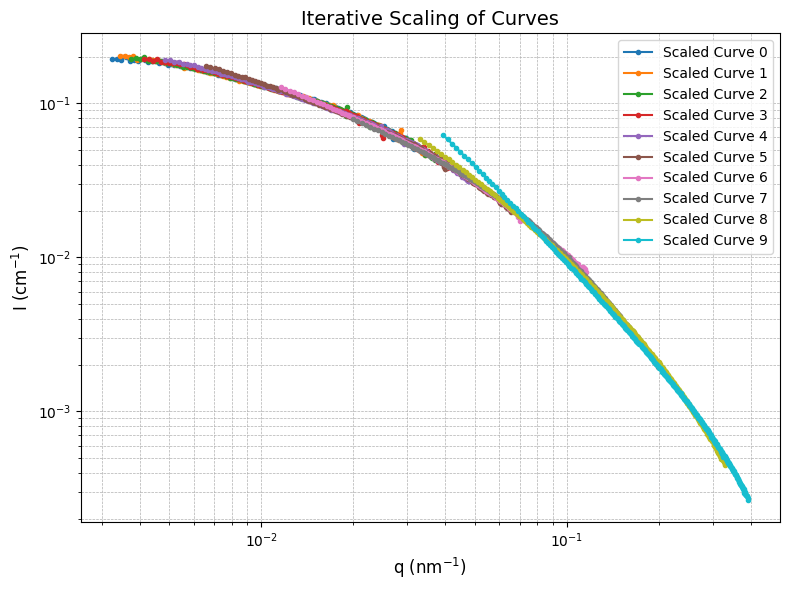

In [5]:

# Print the results
for result in scaling_results:
    print(f"Curve {result[0]}: q_scale={result[1]:.4f}, i_scale={result[2]:.4f}, chi2={result[3]:.4f}")

# Plot all the scaled curves
fig, ax = plt.subplots(figsize=(8, 6))
for i, (scaled_x, scaled_y) in enumerate(scaled_curves):
    ax.loglog(scaled_x, scaled_y, label=f'Scaled Curve {i}', marker='o', linestyle='-', markersize=3)

# # Plot the initial reference curve
# ref_x = ql_sta_cleaned[0]
# ref_y = avg_ramp_up_cleaned[0]['saxs_1d']
# ax.loglog(ref_x, ref_y, label='Initial Reference Curve', marker='o', linestyle='-', markersize=3)

# Add labels, legend, and grid
ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontsize=12)
ax.set_ylabel('I (cm$^\mathdefault{-1}$)', fontsize=12)
ax.set_title('Iterative Scaling of Curves', fontsize=14)
ax.legend()
ax.grid(which='both', linestyle='--', linewidth=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('Intermediate_Figures/iterative_scaling_plot.pdf')
plt.show()


### Saving the scaled curve

In [9]:

with open('SAXS_Global_Scale.pickle', 'wb') as f:  # 'wb' for binary write mode
    pickle.dump(scaling_results[:-1], f)  # Dump the object to the file
    pickle.dump(scaled_curves[:-1], f)
